In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [2]:
import warnings
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
!pip install pycaret
from pycaret.regression import *


warnings.filterwarnings('ignore')
%matplotlib inline

     |████████████████████████████████| 264 kB 814 kB/s 
     |████████████████████████████████| 24.2 MB 8.2 MB/s 
     |████████████████████████████████| 167 kB 52.2 MB/s 
     |████████████████████████████████| 14.6 MB 20.0 MB/s 
     |████████████████████████████████| 25.9 MB 23.0 MB/s 
     |████████████████████████████████| 111 kB 78.5 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 27.9 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=0e8d342fa39ddf6671bc3acba4465981aa092544bf1df2e18264bd17aede073e
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.15.0-py3-none-any.whl size=105260 sha256=c7f3fbe0e24e0e2e1ff185c4ebdca5c64863e613e3b93d13fd60bd59f56cf67f
  Stored in directory: /root/.cache/pip/wheels/e7

In [3]:
data = pd.read_csv('/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
print('Shape of the given Data-', data.shape)
print('Columns in given data are-',data.columns.values)

Shape of the given Data- (36, 8)
Columns in given data are- ['State/UTs' 'Total Cases' 'Active' 'Discharged' 'Deaths'
 'Active Ratio (%)' 'Discharge Ratio (%)' 'Death Ratio (%)']


In [4]:
#Click show ouput to view the data 

<h1>Data Description</h1>

This dataset contains latest Covid-19 India state-wise data as on September 07, 2021. This dataset can be used to analyze covid condition in India.
This dataset is great for Exploratory Data Analysis

* Attribute Information
* State/UTs - Names of Indian States and Union Territories.
* Total Cases - Total number of confirmed cases
* Active - Total number of active cases
* Discharged - Total number of discharged cases
* Deaths - Total number of deaths
* Active Ratio (%) - Ratio of number of active cases to total cases
* Discharge Ratio (%) - Ratio of number of discharged cases to total cases
* Death Ratio (%) - Ratio of number of deaths to total cases

In [5]:
data.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [7]:
data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.247105e+05,10061.305556,9.023378e+05,12311.472222,1.175000,97.558611,1.266667
std,1.363114e+06,35512.447915,1.319414e+06,23708.098573,3.103863,2.983397,0.566321
min,7.584000e+03,5.000000,7.447000e+03,4.000000,0.010000,81.330000,0.040000
25%,7.699000e+04,153.500000,7.243350e+04,814.000000,0.050000,97.722500,0.955000
50%,4.718740e+05,556.500000,4.635625e+05,5445.500000,0.460000,98.280000,1.300000
75%,1.007885e+06,5343.500000,9.939285e+05,13671.000000,0.797500,98.652500,1.585000
max,6.500617e+06,209335.000000,6.309021e+06,138169.000000,18.340000,99.920000,2.740000


In [8]:
data.style.background_gradient(cmap="Blues")

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.110000,98.190000,1.700000
1,Andhra Pradesh,2030849,14652,2002187,14010,0.720000,98.590000,0.690000
2,Arunachal Pradesh,53807,533,53004,270,0.990000,98.510000,0.500000
3,Assam,595669,5615,584296,5758,0.940000,98.090000,0.970000
4,Bihar,725833,77,716098,9658,0.010000,98.660000,1.330000
5,Chandigarh,65160,32,64311,817,0.050000,98.700000,1.250000
6,Chhattisgarh,1004902,376,990968,13558,0.040000,98.610000,1.350000
7,Dadra and Nagar Haveli and Daman and Diu,10670,5,10661,4,0.050000,99.920000,0.040000
8,Delhi,1438250,377,1412790,25083,0.030000,98.230000,1.740000
9,Goa,174891,702,170972,3217,0.400000,97.760000,1.840000


In [9]:
data = data.rename(columns={'State/UTs': 'State'})
data.at[7,'State']='DNHDD'

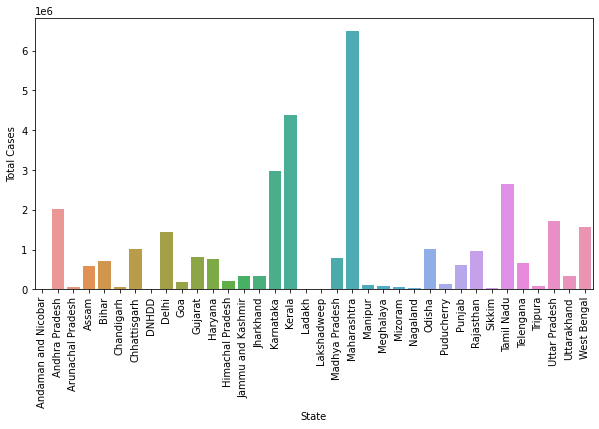

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x= data['State'],y= data['Total Cases'])
plt.xticks(rotation=90)
plt.show()

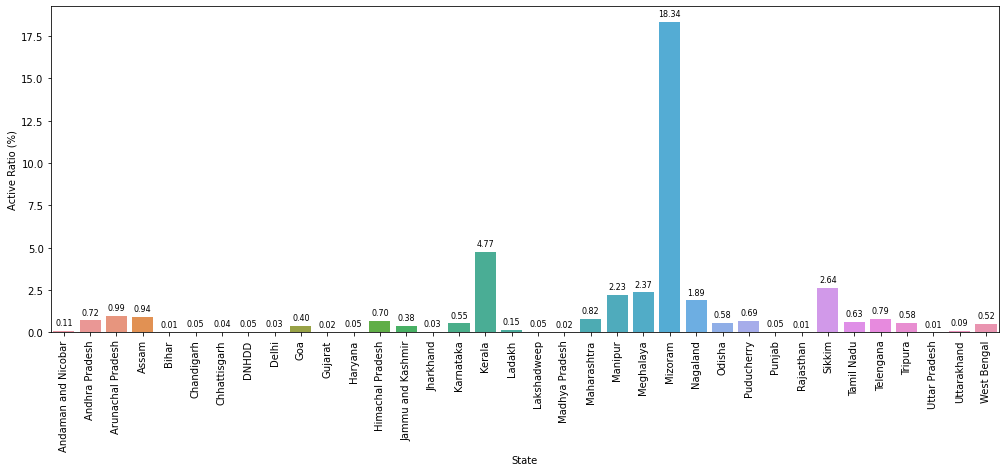

In [11]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Active Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 


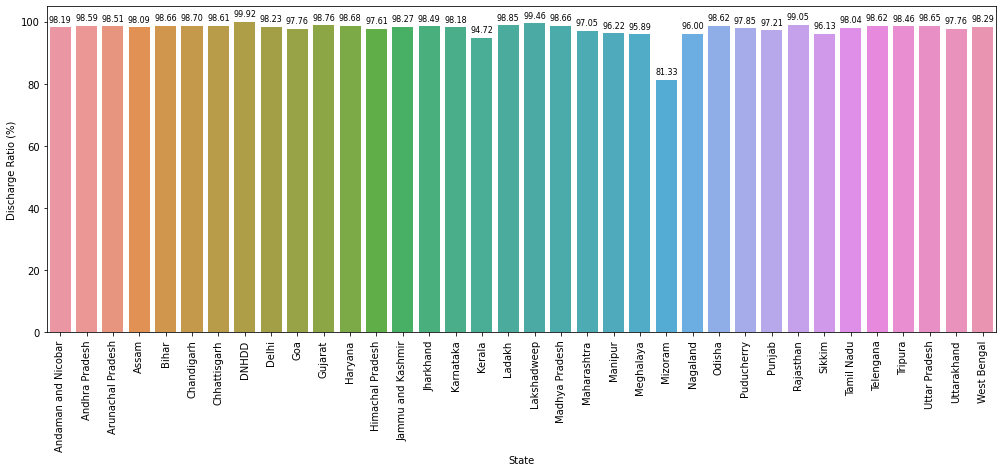

In [12]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Discharge Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

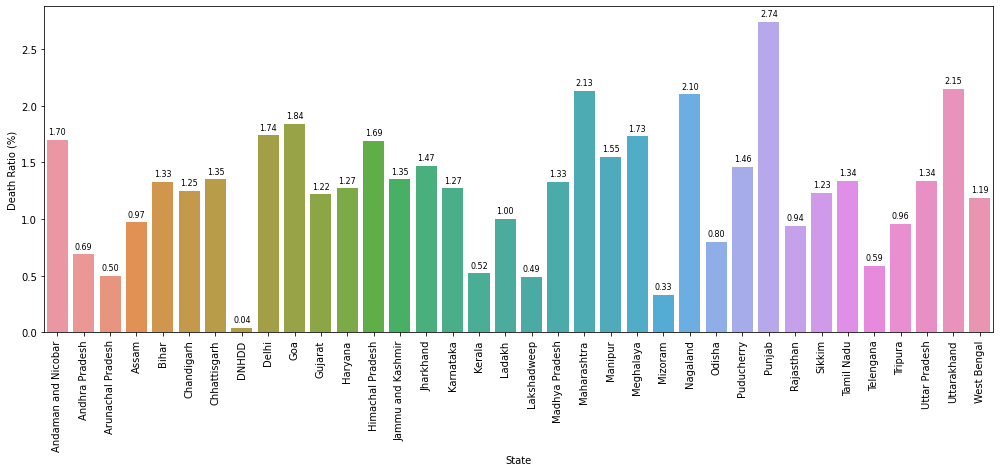

In [13]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Death Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

<AxesSubplot:>

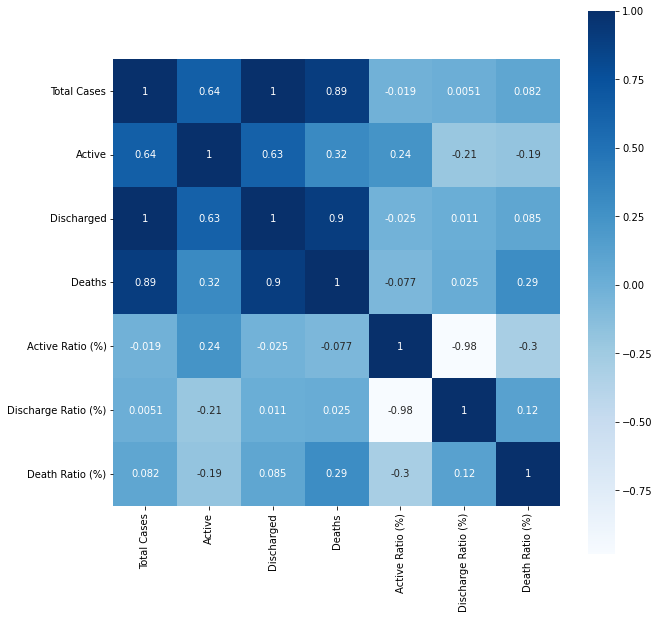

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, square= True, cmap='Blues')

In [15]:
X = data.drop(['State','Death Ratio (%)'],axis=1)
y = data['Death Ratio (%)']

In [16]:
data_1 = data.copy()
data_1.drop(['Death Ratio (%)'],axis=1,inplace=True)
data_1.drop(['State'],axis=1,inplace=True)
col_drop = data_1.iloc[:1]
data_1 = data_1.iloc[1:]
Deaths = col_drop.Deaths
col_drop.drop('Deaths',axis=1,inplace=True)

In [17]:
env = setup(data= data_1,target='Deaths',train_size=0.99,normalize=True,normalize_method='robust',session_id = 69,silent=True)

,Description,Value
0,session_id,69
1,Target,Deaths
2,Original Data,"(35, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(34, 4)"


In [18]:
model = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4568.5837,272263105.9599,7392.1229,0.5385,0.5952,1.1837,0.2340
catboost,CatBoost Regressor,4857.0901,327519887.6165,8023.3475,0.4768,0.7847,1.6417,0.2550
dt,Decision Tree Regressor,5093.8250,273015123.9750,8227.4504,0.4185,0.8317,1.0539,0.0100
xgboost,Extreme Gradient Boosting,4693.4327,277566517.5219,7538.4518,0.4138,0.7873,0.9405,9.7490
gbr,Gradient Boosting Regressor,4775.7806,270080661.5016,7665.5795,0.3490,0.6560,1.4851,0.0200
rf,Random Forest Regressor,5209.9702,299860694.2234,8579.3909,0.2447,0.8672,4.2630,0.2420
ada,AdaBoost Regressor,5194.2270,271058387.7878,8102.5217,0.0964,1.1327,12.7417,0.0350
par,Passive Aggressive Regressor,6607.8012,429713691.3835,8968.1089,-0.0841,1.1445,24.5298,0.0100
knn,K Neighbors Regressor,6491.0216,404962346.6688,10141.9521,-0.3276,1.3838,36.9227,0.0370
en,Elastic Net,6567.8819,318467134.6500,8638.3103,-0.6343,1.1003,26.9441,0.0100


In [19]:
tuned_model = tune_model(model,fold=10,optimize='RMSE',early_stopping=True,early_stopping_max_iters=10,choose_better = True)
final_model = finalize_model(tuned_model)
print(final_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8631.8745,140605026.3926,11857.6990,0.4334,1.4712,3.2380
1,3479.0935,13657624.3934,3695.6223,-2.7555,1.5206,4.2348
2,38538.5103,3964269179.3492,62962.4426,-0.5218,1.2441,0.4891
3,5657.0962,76934149.6770,8771.2114,-0.0740,0.6388,0.3591
4,5447.1116,36659869.4270,6054.7394,0.3491,1.7683,6.3775
5,3441.0348,19013622.4011,4360.4613,-0.3499,0.4677,0.2946
6,2836.8971,11358750.6387,3370.2746,0.7345,4.2061,357.4803
7,2239.6558,8951568.8697,2991.9173,0.2898,1.7677,6.8106
8,4355.5710,19592082.9798,4426.2945,-35.6143,2.9892,37.6098
9,5061.7674,44337935.9278,6658.6737,-0.6191,0.6857,0.3931


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=69, verbose=0, warm_start=False)


In [20]:
from sklearn.linear_model import HuberRegressor
y_train = data_1.Deaths
data_1.drop(['Deaths'],axis=1,inplace=True)
hub = HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
hub.fit(data_1,y_train)
pred = hub.predict(col_drop)

In [21]:
print(f'Predicted Deaths: {int(pred[0])}')
print(f'Actual Casuality caused: {Deaths.values[0]}')

Predicted Deaths: 128
Actual Casuality caused: 129
